In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
view_log_orig = pd.read_csv('view_log.csv')
view_log_orig.shape

(3118622, 5)

In [158]:
view_log_orig.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [159]:
view_log_orig.device_type.value_counts()

android    3117737
iphone         861
web             24
Name: device_type, dtype: int64

In [160]:
#Unique users perecentage
100*(view_log_orig.user_id.value_counts().count())/(view_log_orig.user_id.value_counts().sum())

2.8588588164901036

In [161]:
train= pd.read_csv('train.csv') 

In [162]:
train.user_id.value_counts().count()

74723

In [163]:
item_data_orig = pd.read_csv('item_data.csv')
item_data_orig.shape

(132761, 6)

In [164]:
item_data_orig.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [165]:
train_orig = pd.read_csv('train.csv')
train_orig.shape

(237609, 7)

In [166]:
train_orig.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [167]:
test_orig = pd.read_csv('test.csv')

In [168]:
test_orig.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [169]:
test_orig.shape

(90675, 6)

### EDA

In [170]:
view_log_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118622 entries, 0 to 3118621
Data columns (total 5 columns):
server_time    object
device_type    object
session_id     int64
user_id        int64
item_id        int64
dtypes: int64(3), object(2)
memory usage: 119.0+ MB


In [171]:
view_log_orig.device_type.value_counts()

android    3117737
iphone         861
web             24
Name: device_type, dtype: int64

In [172]:
view_log_orig.isna().sum()

server_time    0
device_type    0
session_id     0
user_id        0
item_id        0
dtype: int64

In [173]:
item_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132761 entries, 0 to 132760
Data columns (total 6 columns):
item_id         132761 non-null int64
item_price      132761 non-null int64
category_1      132761 non-null int64
category_2      132761 non-null int64
category_3      132761 non-null int64
product_type    132761 non-null int64
dtypes: int64(6)
memory usage: 6.1 MB


In [174]:
item_data_orig.isna().sum()

item_id         0
item_price      0
category_1      0
category_2      0
category_3      0
product_type    0
dtype: int64

In [175]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


In [176]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


latest          129216
intermediate     55543
old              52850
Name: os_version, dtype: int64


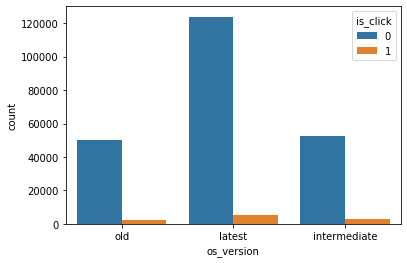

In [177]:
print(train_orig.os_version.value_counts())
sns.countplot(x=train_orig.os_version, hue=train_orig.is_click)

In [178]:
os_version_dummies = pd.get_dummies(train_orig['os_version'], prefix='OS_Version')
train_orig = pd.concat([train_orig, os_version_dummies], axis = 1)
train_orig.drop('os_version',inplace=True, axis=1)

In [179]:
#Test Data - Generating dummies for ('os_version')
os_version_dummies = pd.get_dummies(test_orig['os_version'], prefix='OS_Version')
test_orig = pd.concat([test_orig, os_version_dummies], axis = 1)
test_orig.drop('os_version',inplace=True, axis=1)
test_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 8 columns):
impression_id              90675 non-null object
impression_time            90675 non-null object
user_id                    90675 non-null int64
app_code                   90675 non-null int64
is_4G                      90675 non-null int64
OS_Version_intermediate    90675 non-null uint8
OS_Version_latest          90675 non-null uint8
OS_Version_old             90675 non-null uint8
dtypes: int64(3), object(2), uint8(3)
memory usage: 3.7+ MB


#### EDA for app_code column and generating dummies

In [180]:
#Original Train data shape
train_orig.shape

(237609, 9)

In [181]:
test_orig.shape

(90675, 8)

In [182]:
train_orig.app_code.value_counts().count()

490

In [183]:
#Get Common app_code between Train and Test Data
train_orig = train_orig[train_orig.app_code.isin(test_orig.app_code) == True]
train_orig.shape

(236899, 9)

In [184]:
test_orig.loc[test_orig.app_code.isin(train_orig.app_code) == False,'app_code'] = 8939661645

In [185]:
test_orig.app_code.value_counts().count()

342

In [186]:
test_orig[test_orig.app_code == 8939661645]

,impression_id,impression_time,user_id,app_code,is_4G,OS_Version_intermediate,OS_Version_latest,OS_Version_old
480,49cbd6103967e1845ea3876a2875afac,2018-12-12 22:32:00,41269,8939661645,0,0,0,1
2040,6a239d26b2040ff72d820b7b9c7c59b8,2018-12-13 00:11:00,41269,8939661645,0,0,0,1
3894,5190d12ad48dc406f38cf0986837e7df,2018-12-13 19:58:00,36439,8939661645,1,1,0,0
11120,d80140818c83d530a59796c5e798f787,2018-12-14 10:47:00,1832,8939661645,0,0,1,0
12021,5daafff48099e44bf561afbf5a2d6f95,2018-12-12 04:32:00,10423,8939661645,0,0,1,0
12935,85d41899003777333ef3f3e149e7df0e,2018-12-14 18:11:00,33094,8939661645,1,0,1,0
19106,4f957d518d6e8f4af637baf206b4cc42,2018-12-14 16:41:00,41269,8939661645,0,0,0,1
20485,9aafd5557986ba63f49b2e29cfacc404,2018-12-15 00:41:00,71199,8939661645,1,0,1,0
21261,4840396238031bc3de71438b5d81c925,2018-12-15 06:26:00,77742,8939661645,1,0,1,0
23518,089b2daf94346851fc9d72f7e40757b2,2018-12-15 00:29:00,71199,8939661645,1,0,1,0


In [187]:
#Train Data - Generating dummies for ('app_code') column
app_code_dummies = pd.get_dummies(train_orig['app_code'], prefix='app_code')
train_orig = pd.concat([train_orig, app_code_dummies], axis = 1)
train_orig.drop('app_code',inplace=True, axis=1)
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236899 entries, 0 to 237608
Columns: 349 entries, impression_id to app_code_522
dtypes: int64(3), object(2), uint8(344)
memory usage: 88.6+ MB


In [188]:
#Test Data - Generating dummies for ('os_version')
app_code_dummies = pd.get_dummies(test_orig['app_code'], prefix='app_code')
test_orig = pd.concat([test_orig, app_code_dummies], axis = 1)
test_orig.drop('app_code',inplace=True, axis=1)
test_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Columns: 349 entries, impression_id to app_code_8939661645
dtypes: int64(2), object(2), uint8(345)
memory usage: 32.6+ MB


In [189]:
#Remove the column replaced as 8939661645 from test data
test_orig.drop('app_code_8939661645', inplace=True, axis=1)

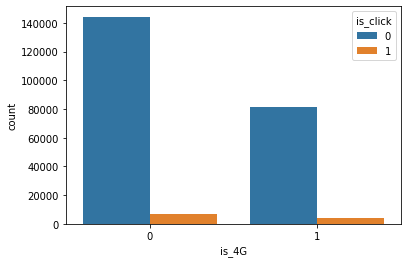

In [190]:
sns.countplot(x=train_orig.is_4G, hue=train_orig.is_click)

In [191]:
train_orig.is_4G.value_counts()

0    151284
1     85615
Name: is_4G, dtype: int64

In [192]:
is_4G_dummies = pd.get_dummies(train_orig['is_4G'], prefix='is_4G')
train_orig = pd.concat([train_orig, is_4G_dummies], axis = 1)
train_orig.drop('is_4G',inplace=True, axis=1)

In [193]:
#Drop impression_id column as it is of no use
train_orig.drop('impression_id',inplace=True, axis=1)

In [194]:
train_orig.is_click.value_counts()
#Data is biased towards is_click as 0

0    226079
1     10820
Name: is_click, dtype: int64

In [195]:
train_orig['impression_time']

0         2018-11-15 00:00:00
1         2018-11-15 00:01:00
2         2018-11-15 00:02:00
3         2018-11-15 00:02:00
4         2018-11-15 00:02:00
                 ...         
237604    2018-12-13 07:40:00
237605    2018-12-13 07:41:00
237606    2018-12-13 07:42:00
237607    2018-12-13 07:43:00
237608    2018-12-13 07:43:00
Name: impression_time, Length: 236899, dtype: object

In [196]:
#Convert the 'impression_time' column to datetime to perform operations
train_orig['impression_time'] = pd.to_datetime(train_orig['impression_time'])

In [197]:
#Convert the 'impression_time' column to datetime to perform operations
test_orig['impression_time'] = pd.to_datetime(test_orig['impression_time'])

In [198]:
#Extracting the hour(0-23), weekday number(0-6) and weekday name() in text from 
train_orig['hour_in_day'] = train_orig['impression_time'].apply(lambda val : val.hour)
train_orig['weekday'] = train_orig['impression_time'].apply(lambda val: val.dayofweek)
train_orig['day_name'] = train_orig['impression_time'].apply(lambda x: x.strftime('%A'))
train_orig.drop('impression_time', axis=1, inplace=True)

In [199]:
#Extracting the hour(0-23), weekday number(0-6) and weekday name() in text from impression_time
test_orig['hour_in_day'] = test_orig['impression_time'].apply(lambda val : val.hour)
test_orig['weekday'] = test_orig['impression_time'].apply(lambda val: val.dayofweek)
test_orig.drop('impression_time', axis=1, inplace=True)

In [200]:
train_orig['weekday'].value_counts()

1    43818
0    34870
3    33863
6    31609
5    31196
4    30836
2    30707
Name: weekday, dtype: int64

In [201]:
train_orig['day_name'].value_counts()

Tuesday      43818
Monday       34870
Thursday     33863
Sunday       31609
Saturday     31196
Friday       30836
Wednesday    30707
Name: day_name, dtype: int64

In [202]:
train_orig['hour_in_day'].value_counts()

0     21142
20    15331
21    15260
22    14471
19    13954
17    13752
18    13699
23    12919
16    12895
15    11920
14    11060
1     10734
13    10236
12     9751
11     9517
10     8959
9      8302
8      6071
7      5057
2      4694
6      3091
5      1587
3      1343
4      1154
Name: hour_in_day, dtype: int64

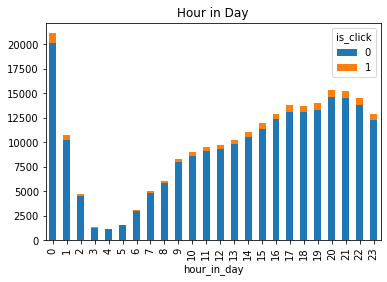

In [203]:
train_orig.groupby(['hour_in_day', 'is_click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")

In [204]:
#creating a temporary dataframe to understand the possible relationship between hour of the day, day of the week relationship with the clicks
day_df = pd.DataFrame()

In [205]:
day_df['day'] = train_orig[['day_name','is_click']].groupby(['day_name']).count().reset_index().sort_values('is_click',ascending=False)['day_name']

In [206]:
day_df

,day
5,Tuesday
1,Monday
4,Thursday
3,Sunday
2,Saturday
0,Friday
6,Wednesday


In [207]:
day_df['total_impressions'] = train_orig[['day_name','is_click']].groupby(['day_name']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
day_df

,day,total_impressions
5,Tuesday,43818
1,Monday,34870
4,Thursday,33863
3,Sunday,31609
2,Saturday,31196
0,Friday,30836
6,Wednesday,30707


In [208]:
#day_df['pos_clicks'] = train_orig[['day_name','is_click']].groupby(['day_name']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
day_df['pos_clicks'] = train_orig[['day_name','is_click']][train_orig.is_click == 1].groupby(['day_name']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
#train_orig[['day_name','is_click']].groupby(['day_name']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
day_df

,day,total_impressions,pos_clicks
5,Tuesday,43818,1883
1,Monday,34870,1627
4,Thursday,33863,1551
3,Sunday,31609,1515
2,Saturday,31196,1498
0,Friday,30836,1376
6,Wednesday,30707,1370


In [209]:
#Calulating the actual click through percentage
day_df['click_pct'] = 100*day_df['pos_clicks']/day_df['total_impressions']
day_df.sort_values(ascending = False, by = 'click_pct')
#Saturday and Sunday offers the highest click rate for ads respectively

,day,total_impressions,pos_clicks,click_pct
2,Saturday,31196,1498,4.801898
3,Sunday,31609,1515,4.792939
1,Monday,34870,1627,4.665902
4,Thursday,33863,1551,4.580220
0,Friday,30836,1376,4.462317
6,Wednesday,30707,1370,4.461523
5,Tuesday,43818,1883,4.297321


In [210]:
train_orig.isna().sum()

user_id                    0
is_click                   0
OS_Version_intermediate    0
OS_Version_latest          0
OS_Version_old             0
                          ..
is_4G_0                    0
is_4G_1                    0
hour_in_day                0
weekday                    0
day_name                   0
Length: 351, dtype: int64

In [211]:
#Drop day_name as it was used just for labelling purpose
train_orig.drop('day_name', inplace=True, axis=1)

In [212]:
weekday_dummies = pd.get_dummies(train_orig['weekday'], prefix='weekday')
train_orig = pd.concat([train_orig, weekday_dummies], axis = 1)
train_orig.drop('weekday',inplace=True, axis=1)

In [213]:
hour_in_day_dummies = pd.get_dummies(train_orig['hour_in_day'], prefix='hour_in_day')
train_orig = pd.concat([train_orig, hour_in_day_dummies], axis = 1)
train_orig.drop('hour_in_day',inplace=True, axis=1)

In [214]:
train_orig.drop('user_id',inplace=True, axis=1)

In [215]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236899 entries, 0 to 237608
Columns: 378 entries, is_click to hour_in_day_23
dtypes: int64(1), uint8(377)
memory usage: 98.8 MB


### Feature correlation

In [216]:
# compare the correlation between features and remove one of two features that have a correlation higher than 0.9
import numpy as np
corr = train_orig.corr().abs()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train_orig.columns[columns]
len(selected_columns)
#No significant correlation within the features

377

In [217]:
#Correlation with output variable
cor_target = abs(corr["is_click"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features.index
#No significant correlation with the target variable as well

Index(['is_click'], dtype='object')

In [218]:
#train_orig[['app_code']] = scalar.fit_transform(train_orig[['app_code']])

In [219]:
# sns_plot = sns.pairplot(train_orig,hue='is_click',diag_kind='kde')
# sns_plot.savefig("pairPlot_Train.png")

In [220]:
y = train_orig['is_click']
X = train_orig.drop(columns = ['is_click'], axis=1)

In [221]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [222]:
#converting Series to frame as sklearn standardscalar accepts only frames
y_train = y_train.to_frame()
y_val = y_val.to_frame()

In [223]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print(np.bincount(y_train))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[180863 180863]


In [224]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(361726, 377)
(47380, 377)
(361726,)
(47380, 1)


In [225]:
# X_train = scalar.fit_transform(X_train)
# X_val = scalar.transform(X_val)

In [226]:
impression_id  = test_orig['impression_id']
test_orig.drop('impression_id',inplace=True,axis=1)

In [227]:
test_orig.drop('user_id',inplace=True, axis=1)

In [228]:
is_4G_dummies = pd.get_dummies(test_orig['is_4G'], prefix='is_4G')
test_orig = pd.concat([test_orig, is_4G_dummies], axis = 1)
test_orig.drop('is_4G',inplace=True, axis=1)

In [229]:
weekday_dummies = pd.get_dummies(test_orig['weekday'], prefix='weekday')
test_orig = pd.concat([test_orig, weekday_dummies], axis = 1)
test_orig.drop('weekday',inplace=True, axis=1)

In [230]:
hour_in_day_dummies = pd.get_dummies(test_orig['hour_in_day'], prefix='hour_in_day')
test_orig = pd.concat([test_orig, hour_in_day_dummies], axis = 1)
test_orig.drop('hour_in_day',inplace=True, axis=1)

In [231]:
test_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Columns: 377 entries, OS_Version_intermediate to hour_in_day_23
dtypes: uint8(377)
memory usage: 32.6 MB


#### Scale the test Data

In [232]:
#test_orig[['app_code']] = scalar.transform(test_orig[['app_code']])

### Gradient Boost Classifier Model

In [233]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1, learning_rate=0.1)
gbcl = gbcl.fit(X_train, y_train)


# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "max_depth":[3,5,8],
#     "n_estimators":[50]
#     }

# gbcl = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

# gbcl.fit(X_train, y_train)
print(gbcl.score(X_train, y_train))
# print(gbcl.best_params_)


0.8155758778744132


In [234]:
gbcl.score(X_val,y_val)

0.9413887716336007

In [72]:
test_orig.head()

,app_code,OS_Version_intermediate,OS_Version_latest,OS_Version_old,is_4G_0,is_4G_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_in_day_14,hour_in_day_15,hour_in_day_16,hour_in_day_17,hour_in_day_18,hour_in_day_19,hour_in_day_20,hour_in_day_21,hour_in_day_22,hour_in_day_23
0,-0.903017,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.516862,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.346860,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.311360,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.052509,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [235]:
#Exporting into CSV for test data
y_pred_gbcl = gbcl.predict(test_orig)
data = pd.DataFrame(columns=['impression_id','is_click'])
data['impression_id'] = impression_id
data['is_click'] = y_pred_gbcl
data.to_csv("GradientBoostingClassifier-2.csv", index = False )

In [70]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [244]:
y_pred_val_score = gbcl.predict(X_val)
cnf_matrix = confusion_matrix(y_val, y_pred_val_score)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 5.036968576709796%
Precision metric in the testing dataset: 95.5852972136888%


NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>

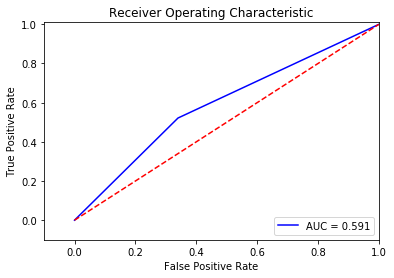

In [72]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
roc_auc

0.5908195211786372

In [91]:
thresholds

array([2, 1, 0], dtype=int64)

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_val)

In [75]:
rf.score(X_val,y_val)

0.874857960523547

In [77]:
y_pred_rf = rf.predict(test_orig)
data = pd.DataFrame(columns=['impression_id','is_click'])
data['impression_id'] = impression_id
data['is_click'] = y_pred_gbcl
data.to_csv("RFC-1.csv", index = False )
#print(test_orig['loan_id'])

Recall metric in the testing dataset: 13.950276243093922%
Precision metric in the testing dataset: 95.66769430472172%


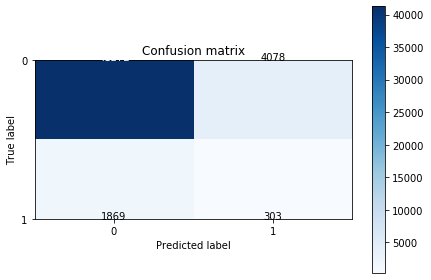

In [78]:
y_pred_val_score = rf.predict(X_val)
cnf_matrix = confusion_matrix(y_val, y_pred_val_score)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

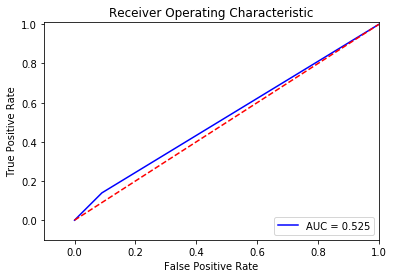

In [79]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistsic  Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_val, y_val)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5197803122764193

In [73]:
y_pred_rf = rf.predict(test_scaled)
data = pd.DataFrame(columns=['impression_id','is_click'])
data['impression_id'] = impression_id
data['is_click'] = y_pred_gbcl
data.to_csv("LR.csv", index = False )

### Deep Neural Network

In [3]:
!pip install keras

In [2]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [1]:
!pip3 install --upgrade tensorflow

  Created wheel for wrapt: filename=wrapt-1.11.2-cp36-none-any.whl size=18733 sha256=d92c0ca3363fa848211206cddeba292c9bf34f7bf14c26c42a0ea4726c591a88
  Stored in directory: C:\Users\abhishekbhardwaj01\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
Successfully built wrapt
  Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3
  Found existing installation: wrapt 1.10.11


ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [2]:
import keras

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)typ

In [237]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [238]:
classifier = Sequential()
#First Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=37))
classifier.add(Dropout(rate=0.25))
#Second  Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.25))
#Second  Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.25))
#Second  Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.25))
#Second  Hidden Layer
classifier.add(BatchNormalization())
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(rate=0.25))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

W0901 21:08:55.948051 109008 deprecation_wrapper.py:119] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [239]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

W0901 21:08:55.971989 109008 deprecation_wrapper.py:119] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [240]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=50, epochs=10)

W0901 21:08:57.213153 109008 deprecation_wrapper.py:119] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 21:08:57.282967 109008 deprecation_wrapper.py:119] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0901 21:08:57.301917 109008 deprecation_wrapper.py:119] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\backend\tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0901 21:08:57.329843 109008 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\keras\backend\tensorf

Epoch 1/10
361726/361726 [==============================] - 38s 106us/step - loss: 0.5320 - acc: 0.7381
Epoch 2/10
361726/361726 [==============================] - 40s 111us/step - loss: 0.5041 - acc: 0.7555
Epoch 3/10
361726/361726 [==============================] - 41s 112us/step - loss: 0.4927 - acc: 0.7636
Epoch 4/10
361726/361726 [==============================] - 39s 108us/step - loss: 0.4874 - acc: 0.7661
Epoch 5/10
361726/361726 [==============================] - 40s 111us/step - loss: 0.4830 - acc: 0.7693
Epoch 6/10
361726/361726 [==============================] - 41s 113us/step - loss: 0.4801 - acc: 0.7715
Epoch 7/10
361726/361726 [==============================] - 62s 172us/step - loss: 0.4772 - acc: 0.7740
Epoch 8/10
361726/361726 [==============================] - 59s 163us/step - loss: 0.4732 - acc: 0.7766
Epoch 9/10
361726/361726 [==============================] - 60s 165us/step - loss: 0.4732 - acc: 0.7773
Epoch 10/10
361726/361726 [==============================] - 59s

In [241]:
classifier.evaluate(X_val,y_val,batch_size= 20,verbose=1)

47380/47380 [==============================] - 5s 97us/step


[0.37107808865314296, 0.9422118968478533]

In [242]:
y_pred_dnn = classifier.predict(test_orig)
labels = (y_pred_dnn > 0.5).astype(np.int)

In [89]:
#For multiclass classification
#probas = np.array([[0.4, 0.1, 0.5],[0.7, 0.2, 0.1],[0.3, 0.4, 0.3]])
# labels = np.argmax(probas, axis=-1)    
# print(labels)

In [243]:
data = pd.DataFrame(columns=['impression_id','is_click'])
data['impression_id'] = impression_id
data['is_click'] = labels
data.to_csv("DNNClassifier-2.csv", index = False )
#print(test_orig['loan_id'])

In [314]:
labels

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])